# A player has a 20% chance of playing a valid move in Othello. If they attempt to play 10 moves, what is the probability that 2 are valid?
# We assume the player has a 20% chance of playing a valid move (playing a random move in a non-occupied square at the starting position).
# We also assume that each attempt to play a move is independent.
# The random variable I am examining is the probability of playing a valid move in Othello.
# One trial would look like calculating the odds for each move, then recording if 2 of those were valid.
# A success would be playing 2 valid moves, while a failure would be playing 0-1 or 3-10 valid moves.
# ~30.20%

In [3]:
!pip install gymnasium
!pip install 'gymnasium[atari]'
!pip install 'gymnasium[other]'
!pip install ale-py
!pip install autorom[accept-rom-license]

   ---------------------------------------- 0.0/951.1 kB ? eta -:--:--
   --------------------------------------- 951.1/951.1 kB 10.9 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   ---------------------------------------- 2/2 [gymnasium]



ERROR: Invalid requirement: "'gymnasium[atari]'": Expected package name at the start of dependency specifier
    'gymnasium[atari]'
    ^
ERROR: Invalid requirement: "'gymnasium[other]'": Expected package name at the start of dependency specifier
    'gymnasium[other]'
    ^


   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   ------------------------------ --------- 2.6/3.5 MB 19.1 MB/s eta 0:00:01
   ---------------------------------------- 3.5/3.5 MB 19.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for AutoROM.accept-rom-license: filename=autorom_accept_rom_license-0.6.1-py3-none-any.whl size=446730 sha256=8df99d57bc4a140adef0a677f05ebf75e71a9b77b18f3a2889f9a904e695bb03
  Stored in directory: c:\users\ecarter\appdata\local\pip\cache\wheels\1b\95\87\203c013580feaad02275c76c821997abed70f27b3b3cdbffa9
Successfully built AutoROM.accept-rom-license

   -------------------- ------------------- 1/2 [autorom]
   -----------------

In [4]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

Episode finished. Total reward: 1.0
Played valid move: True


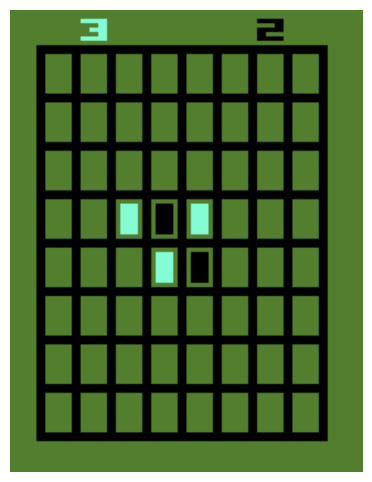

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display

env = gym.make("ALE/Othello-v5", render_mode="rgb_array")

# Reset the environment
obs, info = env.reset()

# Initial frame for comparison and display
prev_frame = env.render()

plt.figure(figsize=(6, 6))
img = plt.imshow(prev_frame)
plt.axis("off")

done = False
played_valid_move = False
total_reward = 0

move = 0

while not done:
    if move == 0:
        action = 1
    elif move <= 100: # 100 random directional moves
        action = random.randint(2, 9)
    else:
        action = 1
        done = True
    
    # Step environment
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    # Render new frame
    new_frame = env.render()

    if done:
        # Compare the top portion of the two frames (e.g., top 5% of the image height)
        height = new_frame.shape[0]
        top_rows = int(height * 0.05)
    
        prev_top = prev_frame[:top_rows, :, :]
        new_top = new_frame[:top_rows, :, :]

        played_valid_move = not np.array_equal(new_top, prev_top)
    
    # Check if the frame changed (indicating a valid move)
    if not np.array_equal(new_frame, prev_frame):
        prev_frame = new_frame
        img.set_data(new_frame)
        display.display(plt.gcf())
        display.clear_output(wait=True)
    
    move += 1

env.close()
print("Episode finished. Total reward:", total_reward)
print("Played valid move:", played_valid_move)